## Load Modeling Analysis

This notebook assumes that the network path (and therefore propagation delays) between a probe and an anchor is constant over the period of time, and looks for correlations in the deviation from minimum RTT from one probe to multiple anchors, and from one anchor to multiple probes, to find "high activity" periods on the probes/anchors.

It uses only Atlas data; there aren't multiple targets in the MONROE dataset.

This experiment didn't work out; the time resolution is too low and the target (anchor) networks generally too well provisioned. See [the pingme notebook](pingme.ipynb) for a more contrived experiment which shows the effect this was meant to.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import math

from collections import namedtuple

import warnings
warnings.filterwarnings("ignore") 

In [2]:
with pd.HDFStore('atlas.hdf5') as store:
    anchor_df = store['anchor_df']
    probe_df = store['probe_df']
    atlas_rtt_df = store['rtt_df']

## Generating Probe Load Series

Here, we're interested in probes for which we have more than some number of anchors. 

In [28]:
MIN_ANCHORS = 5
aid_per_pid = atlas_rtt_df.groupby('pid')['aid'].nunique()
pids = [x for x in filter(lambda x: (x < 6000) or (x >=7000),
                          list(aid_per_pid[aid_per_pid >= MIN_ANCHORS].index.values))]

In [29]:
pids

[142,
 1300,
 2052,
 2928,
 3091,
 3413,
 3479,
 3622,
 4784,
 10051,
 10757,
 11061,
 11215,
 11325,
 11608,
 11942,
 12120,
 12211,
 12823,
 13082]

In [30]:
load_rtt_df = atlas_rtt_df[atlas_rtt_df['pid'].isin(pids)]

Now get RTT minima for each PID,AID pair, and subtract this from the RTT data to get a residual RTT measurement per probe, anchor, and time bin.

In [31]:
load_min_df = pd.DataFrame ({'minrtt': load_rtt_df.groupby(['aid','pid'])['rtt'].min(), 
                             'n':      load_rtt_df.groupby(['aid','pid'])['rtt'].count()})
loc_by_aid = anchor_df.loc[:,('lon','lat')]
loc_by_aid.columns = ['alon','alat']
loc_by_pid = probe_df.loc[:,('lon','lat')]
loc_by_pid.columns = ['plon','plat']
load_min_df = loc_by_pid.join(loc_by_aid.join(load_min_df, how="inner"), how="inner")

load_rtt_df = load_rtt_df.join(load_min_df, on=['aid','pid'])
load_rtt_df['residual'] = load_rtt_df['rtt'] - load_rtt_df['minrtt']

For each probe, generate a residual series per anchor, and look for correlations among the series. If all are correlated, the series are a property of the probe, not of the probe/anchor pairs.

In [33]:
residual_s = load_rtt_df.groupby(('pid','aid',pd.Grouper(key='time',freq='15min')))['residual'].first()

In [34]:
load_rtt_df[load_rtt_df['pid'] == 1300]['aid'].value_counts()

335    288
326    288
305    288
274    288
12     288
4      288
Name: aid, dtype: int64

In [47]:
pidx = 0

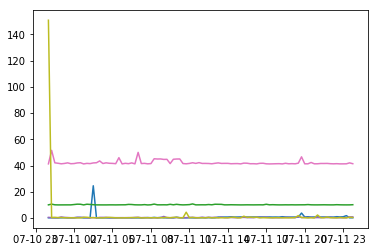

In [48]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

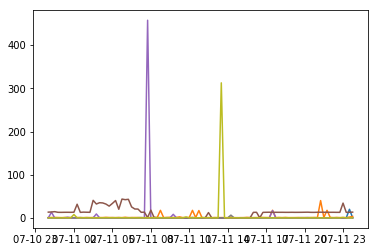

In [49]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

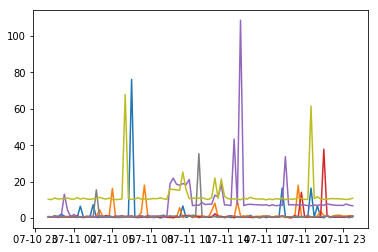

In [50]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

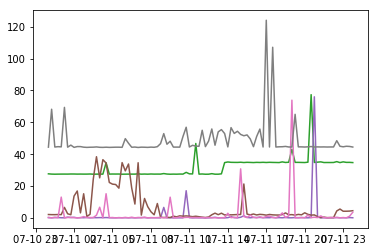

In [51]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

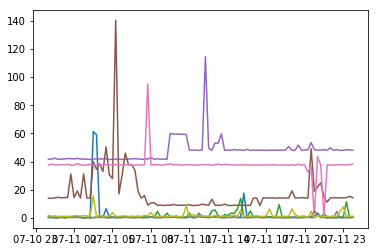

In [52]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

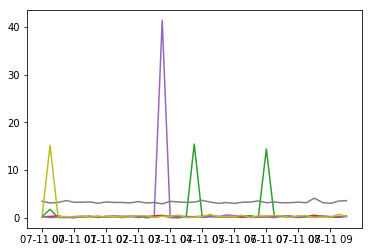

In [53]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

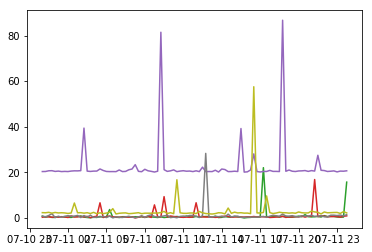

In [54]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

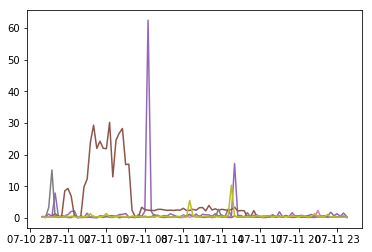

In [55]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

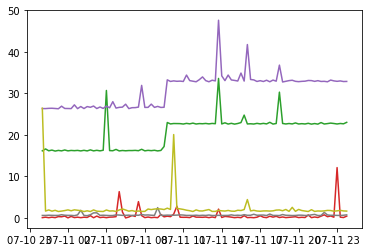

In [56]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

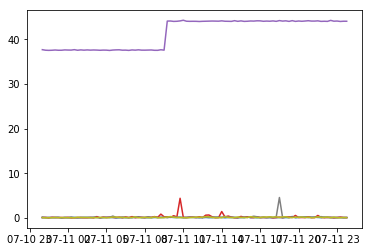

In [57]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

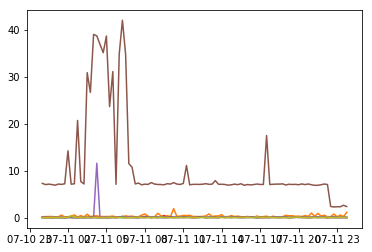

In [58]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

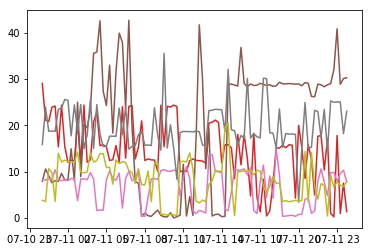

In [59]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

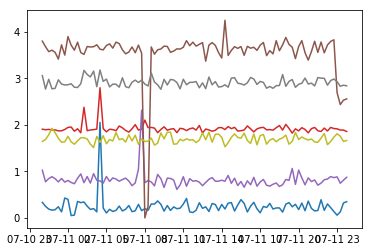

In [60]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

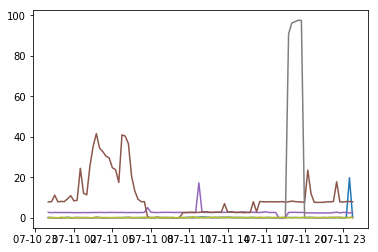

In [61]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

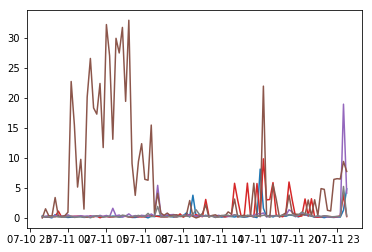

In [62]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

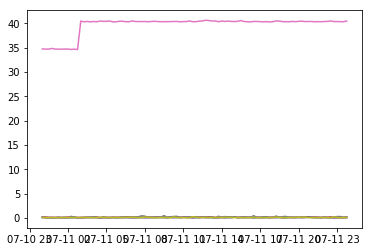

In [63]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

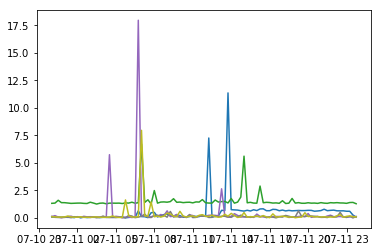

In [64]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

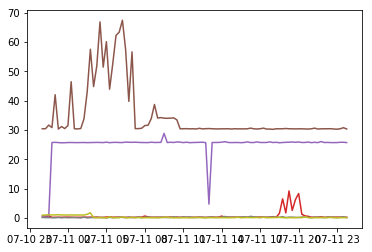

In [65]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

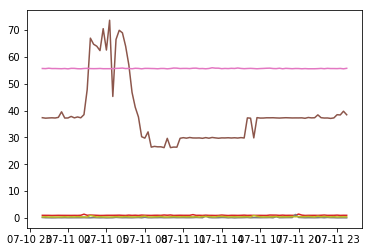

In [66]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

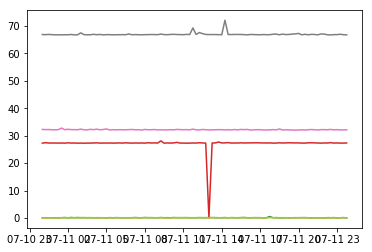

In [67]:
for aid in residual_s.loc[pids[pidx]].index.levels[0]:
    plt.plot(residual_s.loc[pids[pidx]].loc[aid])
pidx += 1

It doesn't look like we have enough resolution in our time series here. 